In [ ]:
import requests

train_file_path = "C:/Users/cecil/Desktop/time_series_forcasting/datasets/Daily Bike Sharing.csv"
forecast_file_path = "C:/Users/cecil/Desktop/time_series_forcasting/datasets/Daily Bike Sharing future.csv"

files = {
    'train_file': open(train_file_path, 'rb'),
    'forecast_file': open(forecast_file_path, 'rb')
}

res = requests.post('http://127.0.0.1:5000/upload', files=files)

print(res.json().get('message'))
print(res.json().get('train_preview'))
print(res.json().get('forecast_exog_preview'))

Files uploaded successfully.
[{'atemp': 0.363625, 'casual': 331, 'cnt': 985, 'dteday': '1/1/2011', 'holiday': 0, 'hum': 0.805833, 'instant': 1, 'mnth': 1, 'registered': 654, 'season': 1, 'temp': 0.344167, 'weathersit': 2, 'weekday': 6, 'windspeed': 0.160446, 'workingday': 0, 'yr': 0}, {'atemp': 0.353739, 'casual': 131, 'cnt': 801, 'dteday': '1/2/2011', 'holiday': 0, 'hum': 0.696087, 'instant': 2, 'mnth': 1, 'registered': 670, 'season': 1, 'temp': 0.363478, 'weathersit': 2, 'weekday': 0, 'windspeed': 0.248539, 'workingday': 0, 'yr': 0}, {'atemp': 0.189405, 'casual': 120, 'cnt': 1349, 'dteday': '1/3/2011', 'holiday': 0, 'hum': 0.437273, 'instant': 3, 'mnth': 1, 'registered': 1229, 'season': 1, 'temp': 0.196364, 'weathersit': 1, 'weekday': 1, 'windspeed': 0.248309, 'workingday': 1, 'yr': 0}]
[{'atemp': 0.359208, 'casual': nan, 'cnt': nan, 'dteday': '12/2/2012', 'holiday': 0, 'hum': 0.823333, 'instant': 702, 'mnth': 12, 'registered': nan, 'season': 4, 'temp': 0.3475, 'weathersit': 2, 'week

In [2]:
# train the model
response = requests.get("http://127.0.0.1:5000/train")

# Access specific fields
data = response.json()
print("Message:", data.get("message"))
print("MAPE:", data.get("mape"))
print("Predictions:", data.get("predictions"))

Message: Forecasting completed successfully.
MAPE: 0.2698299423847716
Predictions: [6329.816734134134, 5437.482734164039, 5776.399540543082, 5834.226140599865, 5780.82380492106, 5119.299920570729, 6201.428927945025, 6392.692750892088, 6612.182216659143, 6366.367332605643, 6447.614810043043, 5351.290252046031, 5894.26021940786, 5588.8713231196425, 6419.403111643763, 6234.565378522743, 5894.334851885702, 5676.068056761165, 5838.236953598978, 6449.208151282383, 6066.380758487542, 6647.839378436027, 5757.389778152424, 5537.246853088298, 6238.322194338897, 5239.769889934478, 6021.244433301993, 6179.973202011729, 6410.223144773027, 5761.077437603202]


In [3]:
# forecast the future
response = requests.get("http://127.0.0.1:5000/forecast")

# Access specific fields
data = response.json()
print("Message:", data.get("message"))
print("Predictions:", data.get("predictions"))

Message: Forecasting completed successfully, Forecasted data saved to 'forecasted_data.csv..
Predictions: [5411.2060097244685, 6798.867763762891, 6905.979726779307, 6698.428681202624, 5880.697530347858, 5677.14781154571, 5999.915236680313, 5609.343574407704, 6050.5372809237115, 5549.486100454752, 5454.705962889662, 6139.856489551235, 6219.192012813406, 6416.949932145417, 5577.35913068999, 5952.0310421879085, 6663.507027487314, 6373.703882483965, 5788.681257136004, 4333.921760540674, 4528.786704035567, 4411.444052070431, 3980.243009012213, 3814.1065252359385, 3149.107246687417, 3883.76808783155, 4207.117014835265, 4071.7237050178355, 4190.633265777274, 3794.1505054627114]


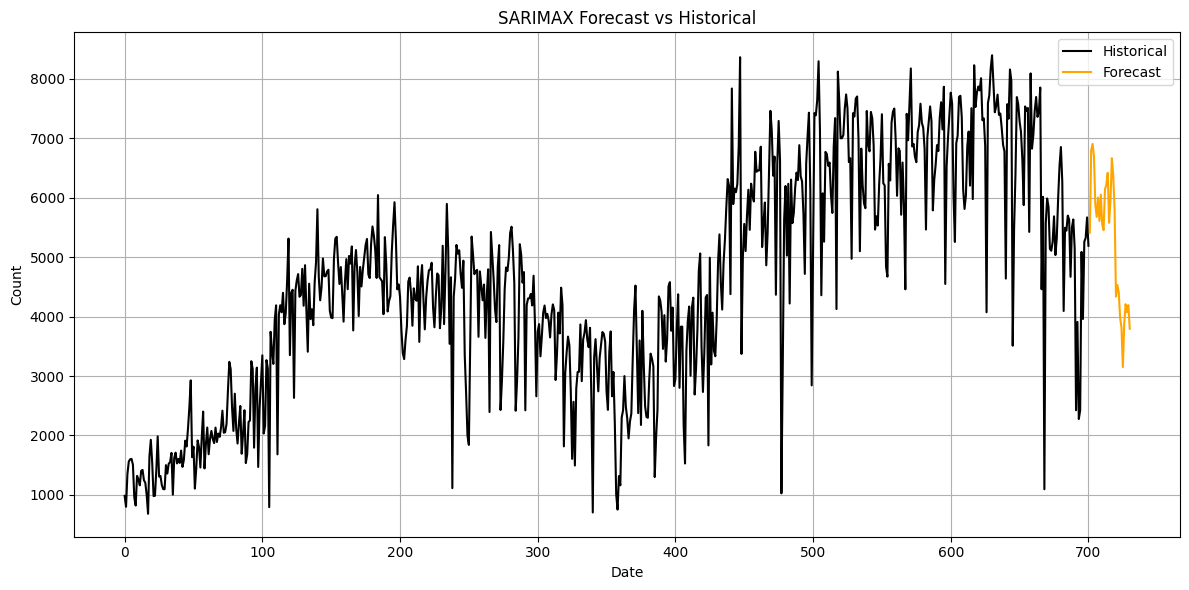

In [5]:
# plot the results
import pandas as pd
import matplotlib.pyplot as plt

df_all = pd.read_csv("results/forecasted_data.csv")

# forcaste
plt.figure(figsize=(12, 6))
df_all[df_all['label'] == 'historical']['cnt'].plot(label='Historical', color='black')
df_all[df_all['label'] == 'forecast']['cnt'].plot(label='Forecast', color='orange')

plt.legend()
plt.title("SARIMAX Forecast vs Historical")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()